<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_0_4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.4'

In [4]:
os.listdir(base_path)

['data_add_delta_-0.4_n20.csv',
 'data_add_delta_-0.4_n30.csv',
 'data_add_delta_-0.4_n60.csv',
 'data_add_delta_-0.4_n120.csv',
 'data_add_delta_-0.4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.171402,74.073550,0.365244,138.610195,138.206795,0.403400
1,0.0,1.0,49.008115,37.366468,-0.145374,96.229209,96.398687,-0.169479
2,0.0,2.0,41.005271,89.400832,-0.708236,139.697868,140.343866,-0.645999
3,0.0,3.0,68.582198,63.727418,-0.593001,141.716614,142.287022,-0.570408
4,0.0,4.0,93.225781,21.547679,-0.121637,124.651823,124.818584,-0.166761
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.595554,49.191935,0.119602,142.907091,142.741501,0.165590
249996,999.0,246.0,99.423948,65.653003,-0.110531,174.966421,175.010545,-0.044124
249997,999.0,247.0,44.876948,81.420192,-1.448203,134.848937,136.214546,-1.365608
249998,999.0,248.0,57.088436,98.242940,-0.740584,164.590791,165.228104,-0.637313


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.171402,74.073550,0.365244,138.610195,138.206795,0.403400
1,0.0,1.0,49.008115,37.366468,-0.145374,96.229209,96.398687,-0.169479
2,0.0,2.0,41.005271,89.400832,-0.708236,139.697868,140.343866,-0.645999
3,0.0,3.0,68.582198,63.727418,-0.593001,141.716614,142.287022,-0.570408
4,0.0,4.0,93.225781,21.547679,-0.121637,124.651823,124.818584,-0.166761
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.595554,49.191935,0.119602,142.907091,142.741501,0.165590
249996,999.0,246.0,99.423948,65.653003,-0.110531,174.966421,175.010545,-0.044124
249997,999.0,247.0,44.876948,81.420192,-1.448203,134.848937,136.214546,-1.365608
249998,999.0,248.0,57.088436,98.242940,-0.740584,164.590791,165.228104,-0.637313


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.171402  74.073550  0.365244  138.610195  138.206795  0.403400
      1.0    49.008115  37.366468 -0.145374   96.229209   96.398687 -0.169479
      2.0    41.005271  89.400832 -0.708236  139.697868  140.343866 -0.645999
      3.0    68.582198  63.727418 -0.593001  141.716614  142.287022 -0.570408
      4.0    93.225781  21.547679 -0.121637  124.651823  124.818584 -0.166761
...                ...        ...       ...         ...         ...       ...
999.0 245.0  83.595554  49.191935  0.119602  142.907091  142.741501  0.165590
      246.0  99.423948  65.653003 -0.110531  174.966421  175.010545 -0.044124
      247.0  44.876948  81.420192 -1.448203  134.848937  136.214546 -1.365608
      248.0  57.088436  98.242940 -0.740584  164.590791  165.228104 -0.637313
      249.0  42.534665  67.584601 -0.541560  119.577705  120.053303 -0.475598

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.171402  74.073550  0.365244  138.610195  138.206795  0.403400
      1.0    49.008115  37.366468 -0.145374   96.229209   96.398687 -0.169479
      2.0    41.005271  89.400832 -0.708236  139.697868  140.343866 -0.645999
      3.0    68.582198  63.727418 -0.593001  141.716614  142.287022 -0.570408
      4.0    93.225781  21.547679 -0.121637  124.651823  124.818584 -0.166761
...                ...        ...       ...         ...         ...       ...
999.0 245.0  83.595554  49.191935  0.119602  142.907091  142.741501  0.165590
      246.0  99.423948  65.653003 -0.110531  174.966421  175.010545 -0.044124
      247.0  44.876948  81.420192 -1.448203  134.848937  136.214546 -1.365608
      248.0  57.088436  98.242940 -0.740584  164.590791  165.228104 -0.637313
      249.0  42.534665  67.584601 -0.541560  119.577705  120.053303 -0.475598

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,54.171402,74.073550,0.365244,138.610195,138.206795,0.403400
1,0.0,1.0,49.008115,37.366468,-0.145374,96.229209,96.398687,-0.169479
2,0.0,2.0,41.005271,89.400832,-0.708236,139.697868,140.343866,-0.645999
3,0.0,3.0,68.582198,63.727418,-0.593001,141.716614,142.287022,-0.570408
4,0.0,4.0,93.225781,21.547679,-0.121637,124.651823,124.818584,-0.166761
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,83.595554,49.191935,0.119602,142.907091,142.741501,0.165590
249996,999.0,246.0,99.423948,65.653003,-0.110531,174.966421,175.010545,-0.044124
249997,999.0,247.0,44.876948,81.420192,-1.448203,134.848937,136.214546,-1.365608
249998,999.0,248.0,57.088436,98.242940,-0.740584,164.590791,165.228104,-0.637313


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    54.171402  74.073550  0.365244  138.610195  138.206795  0.403400
      1.0    49.008115  37.366468 -0.145374   96.229209   96.398687 -0.169479
      2.0    41.005271  89.400832 -0.708236  139.697868  140.343866 -0.645999
      3.0    68.582198  63.727418 -0.593001  141.716614  142.287022 -0.570408
      4.0    93.225781  21.547679 -0.121637  124.651823  124.818584 -0.166761
...                ...        ...       ...         ...         ...       ...
999.0 245.0  83.595554  49.191935  0.119602  142.907091  142.741501  0.165590
      246.0  99.423948  65.653003 -0.110531  174.966421  175.010545 -0.044124
      247.0  44.876948  81.420192 -1.448203  134.848937  136.214546 -1.365608
      248.0  57.088436  98.242940 -0.740584  164.590791  165.228104 -0.637313
      249.0  42.534665  67.584601 -0.541560  119.577705  120.053303 -0.475598

[250000 rows x 6 columns]

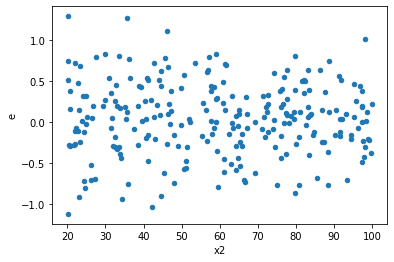

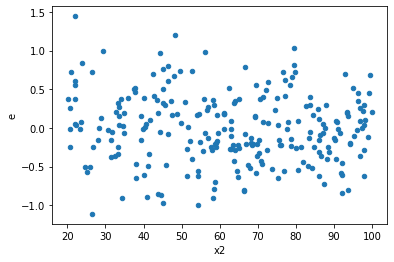

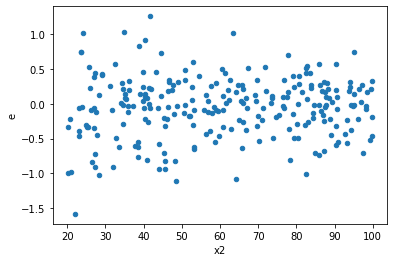

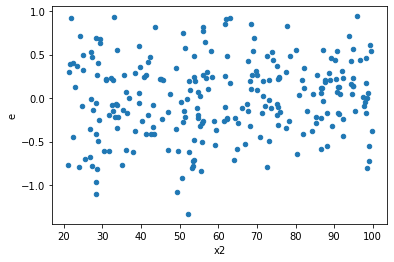

In [17]:
tablenew0 = table.loc[91.0]
tablenew1 = table.loc[105.0]
tablenew2 = table.loc[112.0]
tablenew3 = table.loc[118.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
20.0,98.0,98.0,18.525623275549382,19.60406815763418,0.18903697219948348,0.2000415118125937,1.0582136895500927,0.7799870434966447,0.6100064782516776,0.38999352174832236,Reject001=1 : Homoscedasticity
24.0,98.0,98.0,19.634324967394626,21.487827734540502,0.2003502547693329,0.21926354831163777,1.094401145454395,0.6561097711772748,0.6719451144113626,0.3280548855886374,Reject001=1 : Homoscedasticity
31.0,98.0,98.0,17.615567666361184,19.565606918944393,0.1797506904730733,0.19964905019331014,1.1106997679278323,0.6042960488369982,0.6978519755815009,0.3021480244184991,Reject001=1 : Homoscedasticity
33.0,98.0,98.0,20.87483737416314,23.063233107847996,0.21300854463431773,0.2353391133453877,1.1048341452658905,0.6226434287838867,0.6886782856080567,0.31132171439194334,Reject001=1 : Homoscedasticity
39.0,98.0,98.0,17.691005103814017,22.25787702230864,0.18052046024300017,0.22712119410519022,1.2581465491471737,0.2574143531035902,0.8712928234482049,0.1287071765517951,Reject001=1 : Homoscedasticity
46.0,98.0,98.0,14.712186401668909,16.91919966880311,0.15012435103743785,0.17264489457962356,1.1500125954687361,0.49032118114899426,0.7548394094255029,0.24516059057449713,Reject001=1 : Homoscedasticity
54.0,98.0,98.0,16.873263355396116,20.265734685756247,0.17217615668771546,0.20679321107914536,1.2010560292283476,0.36606977910616334,0.8169651104469183,0.18303488955308167,Reject001=1 : Homoscedasticity
61.0,98.0,98.0,17.814937972748066,18.64800536431001,0.1817850813545721,0.19028576902357153,1.0467622953746067,0.8214918459262885,0.5892540770368557,0.41074592296314427,Reject001=1 : Homoscedasticity
77.0,98.0,98.0,13.805580683977787,15.001075957309476,0.14087327228548763,0.15307220364601506,1.086595073448749,0.6818311514337181,0.659084424283141,0.34091557571685904,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,20.979957172175205,20.495764564156236,0.21408119563444086,0.20914045473628812,0.9769211822481157,0.9082252503622464,Reject001=1 : Homoscedasticity
1.0,98.0,98.0,23.954296949865327,19.260218462146206,0.24443160152923804,0.19653284145047148,0.8040402313813049,0.28203575392232133,Reject001=1 : Homoscedasticity
2.0,98.0,98.0,27.97952638045567,17.16527953687362,0.2855053712291395,0.17515591364156755,0.6134942851950472,0.01637716274270395,Reject001=1 : Homoscedasticity
3.0,98.0,98.0,22.194226406707802,18.50177581338614,0.22647169802763065,0.18879363074883815,0.8336301285903036,0.3693074240035721,Reject001=1 : Homoscedasticity
4.0,98.0,98.0,18.576703312172196,17.359393362100413,0.1895581970629816,0.1771366669602083,0.9344711529481039,0.7379418141667088,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,16.09650566843749,14.225568362822765,0.1642500578411989,0.14515886084513024,0.8837674869221264,0.5419641221208815,Reject001=1 : Homoscedasticity
6.0,98.0,98.0,24.379792772424693,18.794861540988244,0.24877339563698667,0.19178430143865555,0.7709196594257598,0.19959702381469172,Reject001=1 : Homoscedasticity
7.0,98.0,98.0,26.85013503567181,17.770871251838294,0.2739809697517531,0.18133542093712546,0.6618540736658778,0.042309504412933054,Reject001=1 : Homoscedasticity
8.0,98.0,98.0,25.405626936012652,16.512099633998634,0.25924109118380256,0.1684908125918228,0.6499386799462374,0.03407545309195577,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      923
Reject001=0 : Heteroscedasticity     77
Name: Result_test, dtype: int64